In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [2]:
app = dash.Dash()

In [8]:
app.layout = html.Div(children=[
    html.H1(children='Dash Tutorials'),
    dcc.Graph(
        id='example',
        figure={
            'data': [
                {'x': [1, 2, 3, 4, 5], 'y': [9, 6, 2, 1, 5], 'type': 'line', 'name': 'Boats'},
                {'x': [1, 2, 3, 4, 5], 'y': [8, 7, 2, 7, 3], 'type': 'bar', 'name': 'Cars'},
            ],
            'layout': {
                'title': 'Basic Dash Example'
            }
        }
    )
])

In [9]:
if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [11]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div([
    dcc.Input(id='input', value='Enter something here!', type='text'),
    html.Div(id='output')
])

@app.callback(
    Output(component_id='output', component_property='children'),
    [Input(component_id='input', component_property='value')]
)
def update_value(input_data):
    return 'Input: "{}"'.format(input_data)


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [15]:
import pandas_datareader.data as web
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash()

app.layout = html.Div(children=[
    html.Div(children='''
        Symbol to graph:
    '''),
    dcc.Input(id='input', value='', type='text'),
    html.Div(id='output-graph'),
])

@app.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id='input', component_property='value')]
)
def update_value(input_data):
    start = datetime.datetime(2015, 1, 1)
    end = datetime.datetime.now()
    df = web.DataReader(input_data, 'morningstar', start, end)
    df.reset_index(inplace=True)
    df.set_index("Date", inplace=True)
    df = df.drop("Symbol", axis=1)

    return dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': df.index, 'y': df.Close, 'type': 'line', 'name': input_data},
            ],
            'layout': {
                'title': input_data
            }
        }
    )

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 9] Bad file descriptor

# important

In [ ]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [1]:
import pandas as pd
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go

In [3]:
pwd

'/Users/hwang/Desktop/repo/VisualDTA'

In [2]:
df = pd.read_csv('./VisualDTA_java/Samples/IM-conv.txt', sep='\t', lineterminator='\r')

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
graph = nx.Graph()

In [5]:
node_x = []
node_y = []
nodes = {}

for idx, row in df.iterrows():
    # root     
    if idx == 0:
        cur_x = 1
        cur_y = df.Proposition.count()
    # tree     
    else:
        cur_x = nodes[row['Responds To']][0] + row.Distance 
        cur_y = df.Proposition.count() - idx
    node_x.append(cur_x)
    # should be more robust
    node_y.append(cur_y)
    nodes.update({row.Proposition: [cur_x, cur_y]})

In [6]:
for (node, xy) in zip(nodes.keys(), list(zip(node_x, node_y))):
    graph.add_node(node, pos=(xy[0], xy[1]))

In [7]:
edges = []
edges_dotted = []

for idx1, row1 in df.iterrows():
    for idx2, row2 in df.iterrows():
        if row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [0, 'yes', 'y', 'Yes', 'YES', 'Y']:
            edges.append((row1.Proposition, row2.Proposition))
        elif row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [1, 'no', 'n', 'No', 'NO', 'N']:
            edges_dotted.append((row1.Proposition, row2.Proposition))
        else:
            # should raise some error to guide users             
            pass

In [8]:
graph.add_edges_from(edges)

In [9]:
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = graph.nodes[edge[0]]['pos']
    x1, y1 = graph.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
#     edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
#     edge_y.append(None)


In [10]:
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Viridis',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [11]:
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [12]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [13]:
import pandas as pd
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go

In [38]:
df

Proposition       Speaker Responds To Relation Type  Distance  Dotted Line  \
0            1  BrookRashell           0             B         0            0   
1            2     bgpipr13            1             T         0            0   
2            3  BrookRashell           2             T         0            0   
3            4      bgpipr13           3             T         0            0   
4            5  BrookRashell           4             T         0            0   
5            6      bgpipr13           5             P         1            0   
6            7  BrookRashell           6             T         0            0   
7            8  BrookRashell           7             T         0            0   
8            9      bgpipr13           8             T         0            0   
9           10  BrookRashell           7             E         0            0   
10          11  BrookRashell           3             P         1            0   
11         12a      bgpipr13          11             T         0            0   
12         12b      bgpipr13          11             P         1            0   
13          13  BrookRashell         12b             P         1            0   
14          14  BrookRashell         12b             P         1            0   
15          15      bgpipr13          14             T         0            0   
16          16      bgpipr13          13             P         1            0   
17          17      bgpipr13          16             T         0            0   
18          18  BrookRashell          17             T         0            0   
19          19      bgpipr13          17             P         1            0   
20          20  BrookRashell          19             T         0            0   
21          21  BrookRashell         12b             P         1            0   
22         22a      bgpipr13          20             T         0            0   
23         22b      bgpipr13          21             T         0            0   
24          23  BrookRashell         22b             T         0            0   
25          24  BrookRashell         12b             T         0            0   
26          25      bgpipr13          24             T         0            0   
27          26      bgpipr13         12b             E         2            0   
28          27      bgpipr13          11             T         0            0   
29          28      bgpipr13          27             P         1            0   
30          29  BrookRashell          28             T         0            0   
31          30  BrookRashell          29             E         1            0   
32          31  BrookRashell          30             P         1            0   
33          32  BrookRashell          31             T         0            0   
34          33      bgpipr13          32             T         0            0   
35          34  BrookRashell          33             T         0            0   
36          35  BrookRashell          32             T         0            0   
37          36  BrookRashell          31             P         1            0   
38          37      bgpipr13          36             T         0            0   
39          38      bgpipr13          36             T         0            0   
40          39  BrookRashell          38             T         0            0   
41          40      bgpipr13          38             P         2            0   
42          41  BrookRashell          38             P         2            0   
43          42  BrookRashell          40             T         0            0   
44          43      bgpipr13          41             T         0            0   
45          44      bgpipr13          41             P         2            0   
46          45  BrookRashell          38             P         1            0   
47          46      bgpipr13          45             T         0            0   
48          47  BrookRashell      

In [39]:
graph.nodes['1']

{'pos': (1, 76),
 'Proposition': 0    1
 Name: Proposition, dtype: object,
 'Speaker': 0    BrookRashell
 Name: Speaker, dtype: object,
 'Responds To': 0    0
 Name: Responds To, dtype: object,
 'Relation Type': 0    B
 Name: Relation Type, dtype: object,
 'Distance': 0    0
 Name: Distance, dtype: int64,
 'Dotted Line': 0    0
 Name: Dotted Line, dtype: int64,
 'Text': 0    hi!
 Name: Text, dtype: object,
 'Gender': 0    Female
 Name: Gender, dtype: object,
 'Role': 0    Initiator
 Name: Role, dtype: object}

In [36]:
# add nodes' other attributes
attrs = list(df.columns)
for node in nodes.keys():
    for attr in attrs:
        graph.nodes[node][attr] = df[df.Proposition == node][attr]

In [171]:
def visualdta(io='./VisualDTA_java/Samples/IM-conv.txt'):
    """
    
    """
    # read in data     
    df = pd.read_csv(io, sep='\t', lineterminator='\r')
    # construct a graph 
    graph = nx.Graph()
    # infer x, y coordinates from data 
    node_x = []
    node_y = []
    # used to holds nodes' attributes     
    nodes = {}

    for idx, row in df.iterrows():
        # root     
        if idx == 0:
            cur_x = 1
            cur_y = df.Proposition.count()
        # tree     
        else:
            cur_x = nodes[row['Responds To']][0] + row.Distance 
            cur_y = df.Proposition.count() - idx
        node_x.append(cur_x)
        # should be more robust
        node_y.append(cur_y)
        nodes.update({row.Proposition: [cur_x, cur_y]})
    # add nodes to graph with its desired position
    for (node, xy) in zip(nodes.keys(), list(zip(node_x, node_y))):
        graph.add_node(node, pos=(xy[0], xy[1]))

    # add nodes' other attributes
    # should fill in n/a [@TODO]     
    for node in nodes.keys():
        for attr in list(df.columns):
            graph.nodes[node][attr] = df[df.Proposition == node][attr]

    # find edges and dotted edges
    # don't know how to incorporate dotted edges [@TODO]
    # use edge attributes (https://networkx.org/documentation/stable/tutorial.html)
    edges = []
#     edges_dotted = []
    for idx1, row1 in df.iterrows():
        for idx2, row2 in df.iterrows():
            if row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [0, 'yes', 'y', 'Yes', 'YES', 'Y']:
                graph.add_edge(row1.Proposition, row2.Proposition, dotted=False)
#                 edges.append((row1.Proposition, row2.Proposition))
            elif row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [1, 'no', 'n', 'No', 'NO', 'N']:
                graph.add_edge(row1.Proposition, row2.Proposition, dotted=True)
#                 edges_dotted.append((row1.Proposition, row2.Proposition))
            else:
                # should raise some error to guide users [@TODO]            
                pass

    graph.add_edges_from(edges)

    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = graph.nodes[edge[0]]['pos']
        x1, y1 = graph.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
    #     edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
    #     edge_y.append(None)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='Viridis',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='Visual-DTA',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='hhttps://github.com/Wang-Haining/VisualDTA'> https://github.com/Wang-Haining/VisualDTA/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

In [49]:
visualdta()

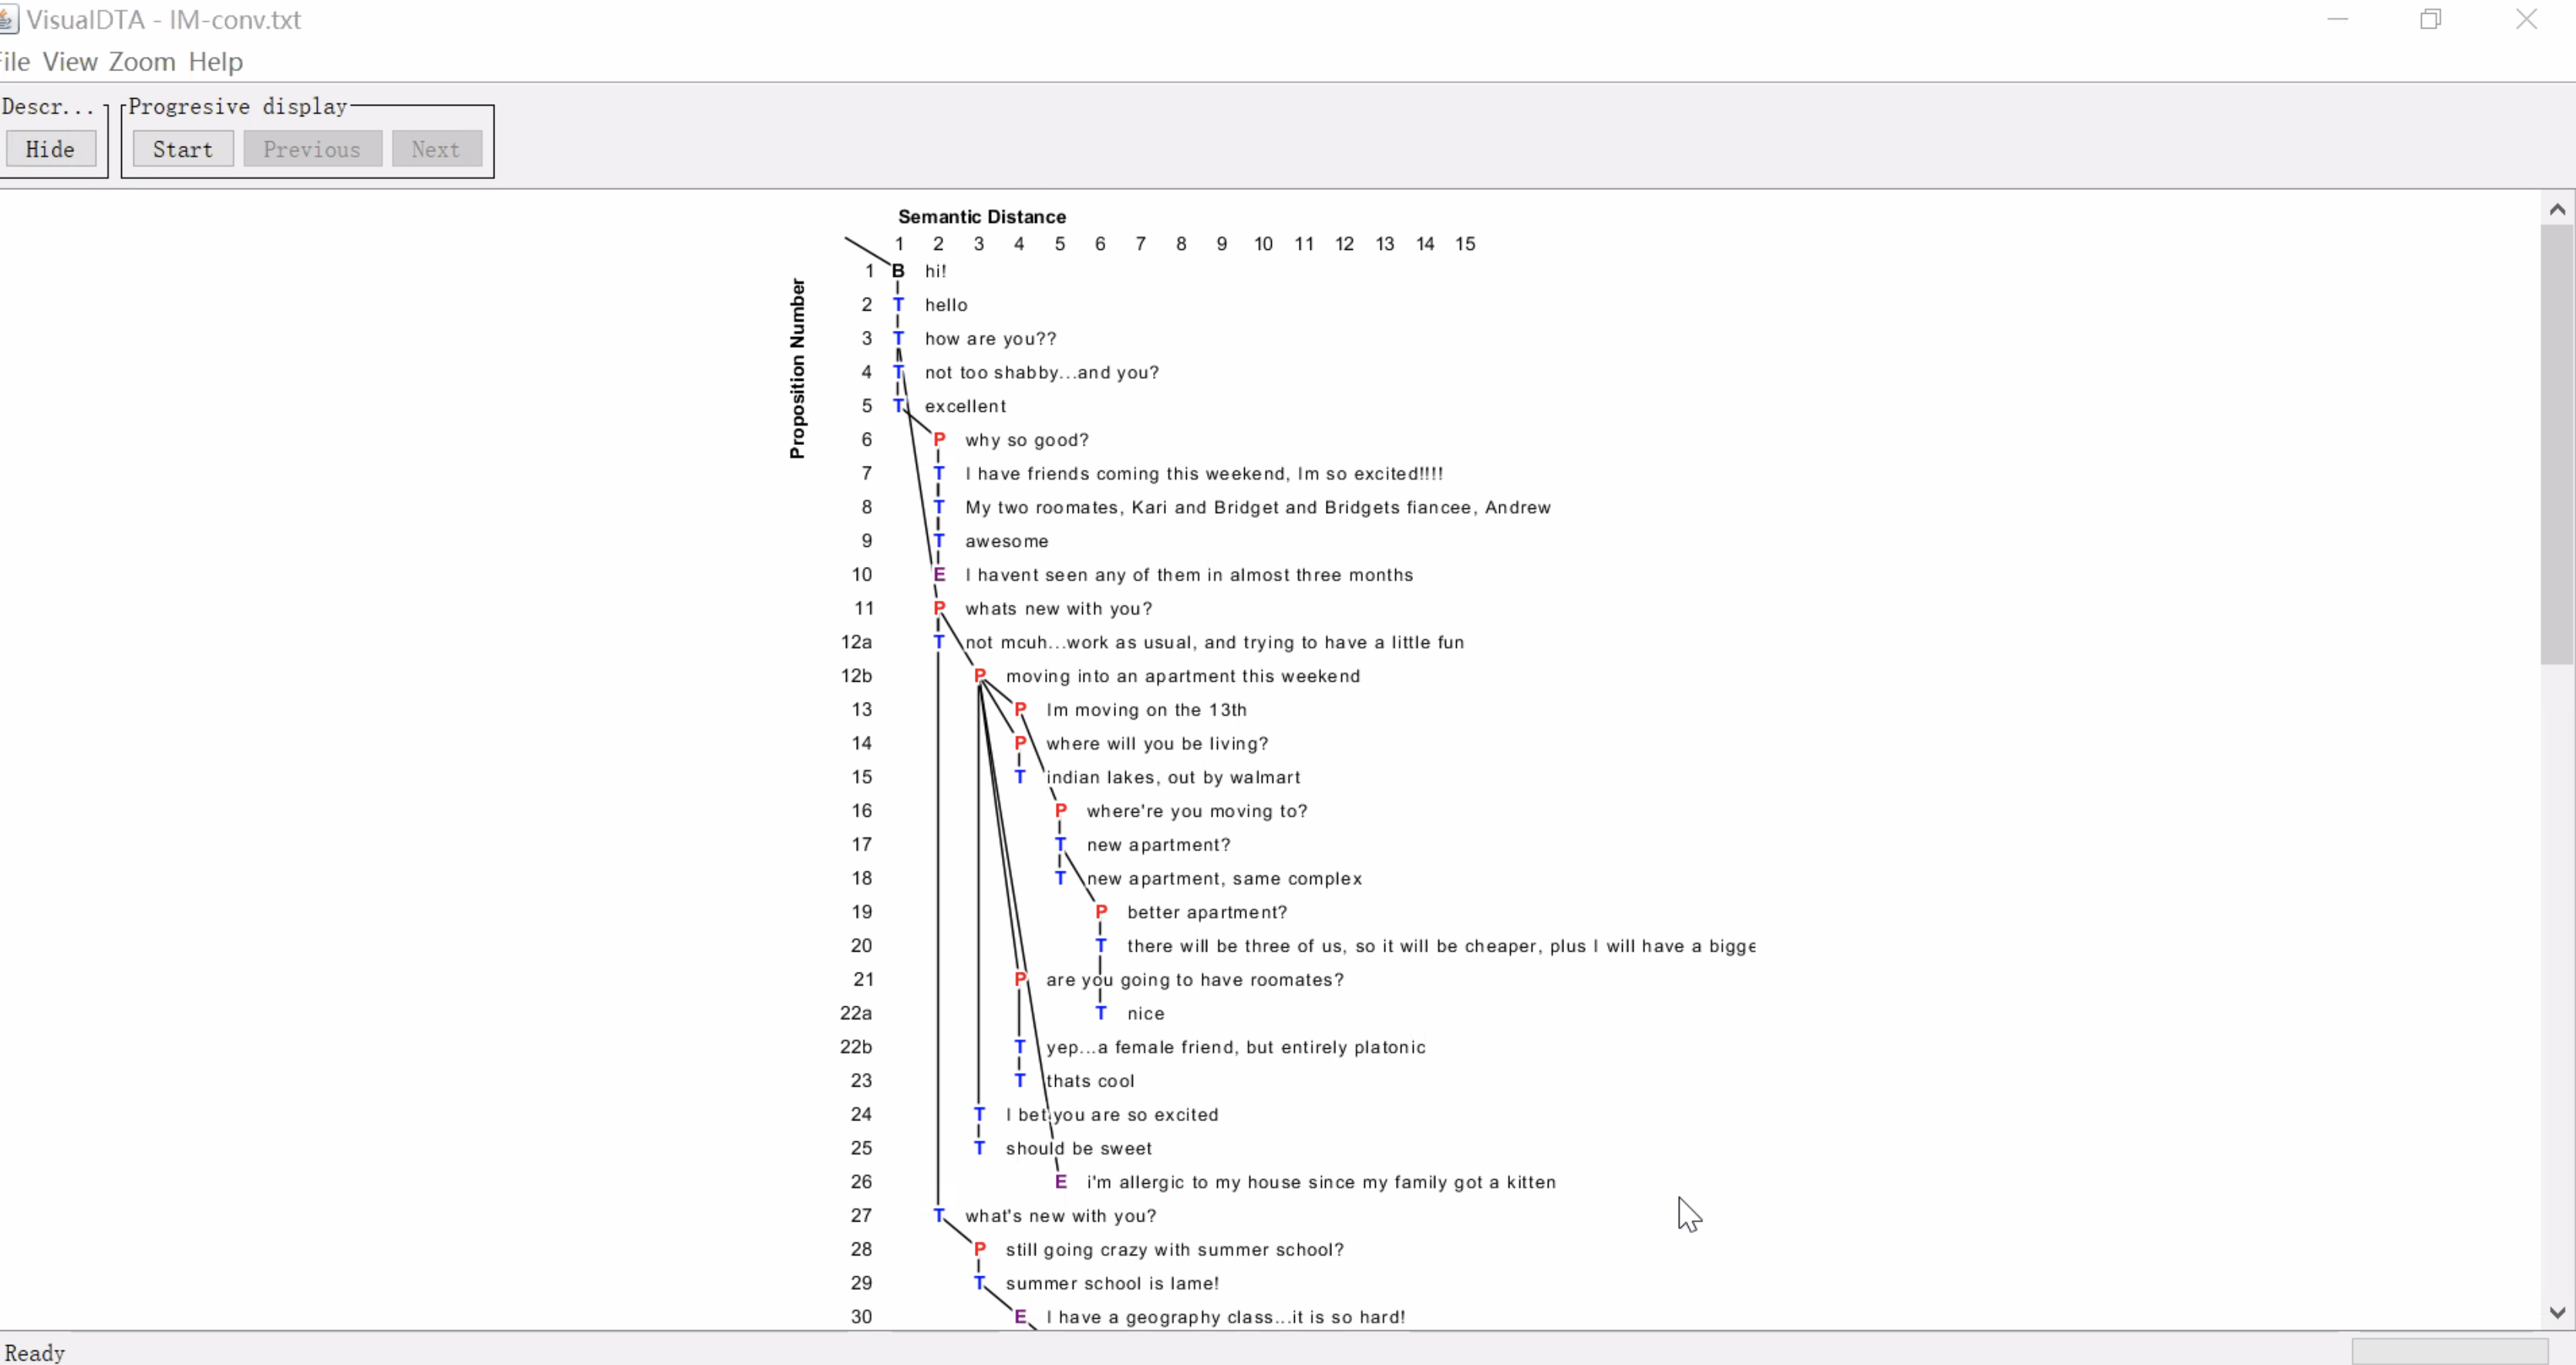

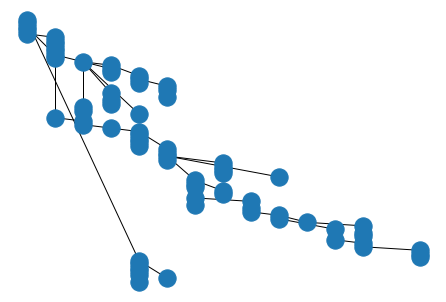

In [201]:
nx.draw(graph, nx.get_node_attributes(graph,'pos'))

In [203]:
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = graph.nodes[edge[0]]['pos']
    x1, y1 = graph.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
#     edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
#     edge_y.append(None)


In [223]:
# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = G.nodes[edge[0]]['pos']
#     x1, y1 = G.nodes[edge[1]]['pos']
#     edge_x.append(x0)
#     edge_x.append(x1)
# #     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
# #     edge_y.append(None)

# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')

# node_x = []
# node_y = []
# for node in G.nodes():
#     x, y = G.nodes[node]['pos']
#     node_x.append(x)
#     node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Viridis',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [133]:
adjacencies[1]

{177: {}, 138: {}, 87: {}, 0: {}, 143: {}, 168: {}}

In [131]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [137]:
adjacencies[1]

{177: {}, 138: {}, 87: {}, 0: {}, 143: {}, 168: {}}

In [136]:
for x in G.adjacency():
    print(x)

(0, {87: {}, 199: {}, 143: {}, 138: {}, 168: {}, 177: {}})
(1, {95: {}, 43: {}, 125: {}, 73: {}, 171: {}, 189: {}, 7: {}})
(2, {27: {}, 114: {}, 178: {}, 34: {}, 6: {}, 154: {}, 163: {}, 14: {}, 102: {}, 79: {}, 97: {}})
(3, {83: {}, 68: {}, 162: {}, 151: {}, 90: {}, 187: {}})
(4, {123: {}, 44: {}, 165: {}, 33: {}, 140: {}, 75: {}, 162: {}, 45: {}, 17: {}, 110: {}})
(5, {92: {}, 189: {}, 7: {}, 43: {}, 144: {}})
(6, {84: {}, 15: {}, 79: {}, 97: {}, 180: {}, 2: {}, 133: {}, 155: {}, 86: {}, 72: {}})
(7, {95: {}, 99: {}, 5: {}, 43: {}, 144: {}, 125: {}, 92: {}, 1: {}, 171: {}, 189: {}})
(8, {60: {}, 32: {}, 66: {}, 182: {}, 38: {}, 149: {}})
(9, {83: {}, 198: {}})
(10, {85: {}, 188: {}, 89: {}, 192: {}, 196: {}, 164: {}, 145: {}, 172: {}, 167: {}, 64: {}, 41: {}})
(11, {158: {}, 65: {}, 153: {}, 36: {}, 49: {}, 16: {}, 62: {}, 164: {}})
(12, {100: {}, 77: {}, 80: {}, 66: {}, 182: {}, 149: {}})
(13, {186: {}, 194: {}, 105: {}, 193: {}, 141: {}, 116: {}})
(14, {163: {}, 126: {}, 144: {}, 1

In [134]:
node_adjacencies

[6,
 7,
 11,
 6,
 10,
 5,
 10,
 10,
 6,
 2,
 11,
 8,
 6,
 6,
 10,
 7,
 6,
 10,
 15,
 6,
 6,
 9,
 4,
 10,
 7,
 8,
 7,
 10,
 5,
 11,
 5,
 9,
 7,
 13,
 8,
 14,
 5,
 4,
 7,
 6,
 7,
 13,
 8,
 8,
 6,
 15,
 7,
 14,
 6,
 7,
 12,
 8,
 8,
 7,
 7,
 6,
 5,
 9,
 2,
 17,
 6,
 8,
 5,
 5,
 14,
 10,
 6,
 9,
 5,
 4,
 12,
 5,
 4,
 8,
 6,
 13,
 11,
 10,
 10,
 11,
 12,
 10,
 6,
 5,
 8,
 14,
 6,
 4,
 10,
 14,
 5,
 13,
 9,
 14,
 7,
 10,
 8,
 10,
 6,
 5,
 5,
 9,
 10,
 11,
 6,
 8,
 5,
 9,
 7,
 6,
 10,
 10,
 12,
 7,
 8,
 12,
 7,
 11,
 10,
 7,
 10,
 13,
 11,
 12,
 6,
 11,
 9,
 10,
 10,
 9,
 13,
 10,
 14,
 7,
 13,
 14,
 18,
 10,
 6,
 7,
 15,
 9,
 9,
 5,
 7,
 9,
 10,
 8,
 3,
 6,
 9,
 11,
 4,
 7,
 8,
 7,
 8,
 7,
 8,
 10,
 9,
 8,
 9,
 9,
 10,
 16,
 7,
 11,
 5,
 7,
 12,
 8,
 10,
 16,
 12,
 10,
 11,
 4,
 10,
 8,
 7,
 9,
 7,
 2,
 5,
 7,
 7,
 11,
 13,
 8,
 14,
 9,
 12,
 9,
 12,
 11,
 11,
 10,
 2,
 6]

In [224]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [225]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [226]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Jet',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [57]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [21]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = go.line(df, x='year', y='lifeExp', color='country', orientation='h')
fig.show()

AttributeError: module 'plotly.graph_objects' has no attribute 'line'

<AxesSubplot:xlabel='year'>

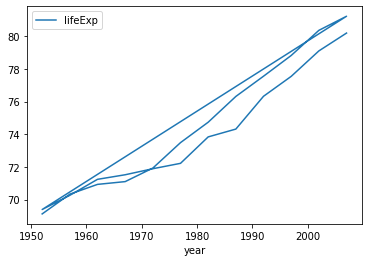

In [14]:
df.plot(x='year', y='lifeExp')

# New edits on the codes

In [ ]:
import numpy as np

In [172]:
def visualdta_demo(df):
    """
    
    """
    # read in data     
    df = df
    # construct a graph 
    graph = nx.Graph()
    # infer x, y coordinates from data 
    node_x = []
    node_y = []
    # used to holds nodes' attributes     
    nodes = {}

    for idx, row in df.iterrows():
        # root     
        if idx == 0:
            cur_x = 1
            cur_y = df.Proposition.count()
        # tree     
        else:
            # deal with the P and T situation         
            if not row['Responds To'] in ['n/a', 'N/A', 'na', 'NA', '', np.nan, 'unknown', 'UNKNOWN']:
                try:
                    # for propositions coded with pure number             
                    cur_x = nodes[int(row['Responds To'])][0] + row.Distance
                except:
                    # in case of string proposition                 
                    cur_x = nodes[row['Responds To']][0] + row.Distance
                cur_y = df.Proposition.count() - idx
            else:
            # deal with the [B]reak situation
            # conveniently set the current point four units to the root         
                cur_x = nodes[0][0] + row.Distance 
                cur_y = df.Proposition.count() - idx

        node_x.append(cur_x)
        node_y.append(cur_y)
        nodes.update({row.Proposition: [cur_x, cur_y]})
    # add nodes to graph with its desired position
    for (node, xy) in zip(nodes.keys(), list(zip(node_x, node_y))):
        graph.add_node(node, pos=(xy[0], xy[1]))

    # add nodes' other attributes
    # should fill in n/a [@TODO]     
    for node in nodes.keys():
        for attr in list(df.columns):
            graph.nodes[node][attr] = df[df.Proposition == node][attr]

    # find edges and dotted edges
    # don't know how to incorporate dotted edges [@TODO]
    # use edge attributes (https://networkx.org/documentation/stable/tutorial.html)
    edges = []
#     edges_dotted = []
    for idx1, row1 in df.iterrows():
        for idx2, row2 in df.iterrows():
            if row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [0, 'yes', 'y', 'Yes', 'YES', 'Y']:
                graph.add_edge(row1.Proposition, row2.Proposition, dotted=False)
#                 edges.append((row1.Proposition, row2.Proposition))
            elif row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [1, 'no', 'n', 'No', 'NO', 'N']:
                graph.add_edge(row1.Proposition, row2.Proposition, dotted=True)
#                 edges_dotted.append((row1.Proposition, row2.Proposition))
            else:
                # should raise some error to guide users [@TODO]            
                pass

    graph.add_edges_from(edges)

    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = graph.nodes[edge[0]]['pos']
        x1, y1 = graph.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
    #     edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
    #     edge_y.append(None)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='Viridis',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='Visual-DTA',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='hhttps://github.com/Wang-Haining/VisualDTA'> https://github.com/Wang-Haining/VisualDTA/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

## Play with my toy data

In [148]:
comments = pd.read_excel('dta.xlsx')

/Users/hwang/anaconda3/envs/chill/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:308: UserWarning:

Unknown extension is not supported and will be removed



In [151]:
visualdta_demo(df=comments)

In [281]:
# read in data     
df = comments
# construct a graph 
graph = nx.Graph()
# infer x, y coordinates from data 
node_x = []
node_y = []
# used to holds nodes' attributes     
nodes = {}

In [282]:
for idx, row in df.iterrows():
    # root     
    if idx == 0:
        cur_x = 1
        cur_y = df.Proposition.count()
    # tree     
    else:
        # deal with the P and T situation         
        if not row['Responds To'] in ['n/a', 'N/A', 'na', 'NA', '', np.nan, 'unknown', 'UNKNOWN']:
            try:
                # for propositions coded with pure number             
                cur_x = nodes[int(row['Responds To'])][0] + row.Distance
            except:
                # in case of string proposition                 
                cur_x = nodes[row['Responds To']][0] + row.Distance
            cur_y = df.Proposition.count() - idx
        else:
        # deal with the [B]reak situation
        # conveniently set the current point four units to the root         
            cur_x = nodes[0][0] + row.Distance 
            cur_y = df.Proposition.count() - idx
        
    node_x.append(cur_x)
    node_y.append(cur_y)
    nodes.update({row.Proposition: [cur_x, cur_y]})


In [283]:
for (node, xy) in zip(nodes.keys(), list(zip(node_x, node_y))):
    graph.add_node(node, pos=(xy[0], xy[1]))

# use df to trace positions
df['pos'] = pd.Series(list(nodes.values()))


In [284]:
edges = []
#     edges_dotted = []
for idx1, row1 in df.iterrows():
    for idx2, row2 in df.iterrows():
        if row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [0, 'yes', 'y', 'Yes', 'YES', 'Y']:
            graph.add_edge(row1.Proposition, row2.Proposition, dotted=False)
#                 edges.append((row1.Proposition, row2.Proposition))
        elif row1.Proposition == row2['Responds To'] and row2['Dotted Line'] in [1, 'no', 'n', 'No', 'NO', 'N']:
            graph.add_edge(row1.Proposition, row2.Proposition, dotted=True)
#                 edges_dotted.append((row1.Proposition, row2.Proposition))
        else:
            # should raise some error to guide users [@TODO]            
            pass

graph.add_edges_from(edges)

edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = graph.nodes[edge[0]]['pos']
    x1, y1 = graph.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
#     edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
#     edge_y.append(None)

In [378]:
# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     name='proposition',
#     mode='markers',
#     hoverinfo='text',
# #     hovertext=annotations,
#     marker=dict(
#         showscale=False,
#         colorscale='Viridis',
#         reversescale=True,
#         color=[],
#         size=5,
#         line_width=2))

node_trace_T = go.Scatter(
    # first entry + all T     
    x= [df.iloc[0:1].pos[0][0]] + [x for [x,y] in  df[df['Relation Type'] == 'T'].pos],
    y= [df.iloc[0:1].pos[0][1]] + [y for [x,y] in  df[df['Relation Type'] == 'T'].pos],
    name='Narrowly on-topic (T)',
    mode='markers',
    hoverinfo='text',
#     hovertext=annotations,
    marker=dict(
        showscale=False,
#         colorscale='Viridis',
#         reversescale=True,
        color='blue',
        size=8,
        line_width=2))

node_trace_P = go.Scatter(
    # first entry + all T     
    x= [x for [x,y] in  df[df['Relation Type'] == 'P'].pos],
    y= [x for [x,y] in  df[df['Relation Type'] == 'P'].pos],
    name='Parallel Shift (P)',
    mode='markers',
    hoverinfo='text',
#     hovertext=annotations,
    marker=dict(
        showscale=False,
#         colorscale='Viridis',
#         reversescale=True,
        color='red',
        size=8,
        line_width=2))

node_trace_B = go.Scatter(
    # first entry + all T     
    x= [x for [x,y] in  df[df['Relation Type'] == 'B'].pos],
    y= [x for [x,y] in  df[df['Relation Type'] == 'B'].pos],
    name='Break (B)',
    mode='markers',
    hoverinfo='text',
#     hovertext=annotations,
    marker=dict(
        showscale=False,
#         colorscale='Viridis',
#         reversescale=True,
        color='green',
        size=8,
        line_width=2))


edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    name="responds to",
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

# hoverlables = []

annotations = [dict(
                    x=df.iloc[i].pos[0],
                    y=df.iloc[i].pos[1],
                    hovertext=df.iloc[i].Speaker,
                    xanchor='right',
                    yanchor='bottom',
                    text=df.iloc[i].Text,
                    visible=True,
                    showarrow=False)
               for i in range(df.shape[0])]



fig = go.Figure(data=[edge_trace, node_trace_T, node_trace_P, node_trace_B],
             layout=go.Layout(
                        title='Visual-DTA: A Demo',
                        titlefont_size=20,
                        showlegend=True,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=annotations,
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=True))
                )

fig.show()

In [ ]:
hoverlables = []

In [289]:
annotations = [dict(
                x=x,
                y=y,
                hovertext=str('sdfsf'),
                xanchor='right',
                yanchor='bottom',
                showarrow=False,
            ) for [x, y] in list(df['pos'])]

In [296]:
df.iloc[0]

Proposition                     0
Speaker                     非官方干扰
send_time        2021-01-08 23:02
Text                      AKA.西天团
Responds To                   NaN
Relation Type                 NaN
Distance                      NaN
Dotted Line                   NaN
pos                       [1, 62]
Name: 0, dtype: object

In [297]:
[dict(x=df.iloc[i].pos[0], y=df.iloc[i].pos[1], hovertext=df.iloc[i].Text, xanchor='right', yanchor='bottom', showarrow=False) for i in range(df.shape[0])]

[{'x': 1,
  'y': 62,
  'hovertext': 'AKA.西天团',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 61,
  'hovertext': '你的头像我很喜欢[doge]所以你能不能把你的头像换了让我换上',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 60,
  'hovertext': '能把你老婆送我吗？送了就换',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 59,
  'hovertext': '[委屈]我没有',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 58,
  'hovertext': '手办一类的也行',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 57,
  'hovertext': 'AKA 大唐御弟',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 56,
  'hovertext': '他说的可能就是手包[doge][doge]',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 2.0,
  'y': 55,
  'hovertext': '痛失左手姑娘[吃瓜]',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y':

In [290]:
annotations

[{'x': 1,
  'y': 62,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 61,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 60,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 59,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 58,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 57,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 56,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 2.0,
  'y': 55,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 'bottom',
  'showarrow': False},
 {'x': 1.0,
  'y': 54,
  'hovertext': 'sdfsf',
  'xanchor': 'right',
  'yanchor': 

In [242]:
annotations = [dict(
                x=x,
                y=y,
                hovertext=str('sdfsf'),
                xanchor='right',
                yanchor='bottom',
                showarrow=False,
            ) for node_value_pairs[1]['pos'] in graph.nodes.data()]

NameError: name 'node_value_pairs' is not defined

In [229]:
[node_value_pairs[1]['pos'] for node_value_pairs in graph.nodes.data()]

[(1, 62),
 (1.0, 61),
 (1.0, 60),
 (1.0, 59),
 (1.0, 58),
 (1.0, 57),
 (1.0, 56),
 (2.0, 55),
 (1.0, 54),
 (2.0, 53),
 (2.0, 52),
 (1.0, 51),
 (5.0, 50),
 (5.0, 49),
 (2.0, 48),
 (5.0, 47),
 (1.0, 46),
 (1.0, 45),
 (1.0, 44),
 (1.0, 43),
 (1.0, 42),
 (1.0, 41),
 (1.0, 40),
 (1.0, 39),
 (2.0, 38),
 (1.0, 37),
 (1.0, 36),
 (1.0, 35),
 (1.0, 34),
 (2.0, 33),
 (1.0, 32),
 (5.0, 31),
 (2.0, 30),
 (1.0, 29),
 (5.0, 28),
 (1.0, 27),
 (1.0, 26),
 (1.0, 25),
 (1.0, 24),
 (5.0, 23),
 (1.0, 22),
 (5.0, 21),
 (1.0, 20),
 (1.0, 19),
 (1.0, 18),
 (2.0, 17),
 (2.0, 16),
 (2.0, 15),
 (1.0, 14),
 (2.0, 13),
 (1.0, 12),
 (2.0, 11),
 (1.0, 10),
 (1.0, 9),
 (1.0, 8),
 (1.0, 7),
 (1.0, 6),
 (1.0, 5),
 (1.0, 4),
 (1.0, 3),
 (1.0, 2),
 (1.0, 1)]

In [227]:
[x for x in graph.nodes.data()]

[(0,
  {'pos': (1, 62), 'Proposition': 0    0
   Name: Proposition, dtype: object, 'Speaker': 0    非官方干扰
   Name: Speaker, dtype: object, 'send_time': 0    2021-01-08 23:02
   Name: send_time, dtype: object, 'Text': 0    AKA.西天团
   Name: Text, dtype: object, 'Responds To': 0    NaN
   Name: Responds To, dtype: object, 'Relation Type': 0    NaN
   Name: Relation Type, dtype: object, 'Distance': 0   NaN
   Name: Distance, dtype: float64, 'Dotted Line': 0   NaN
   Name: Dotted Line, dtype: float64}),
 (1,
  {'pos': (1.0, 61), 'Proposition': 1    1
   Name: Proposition, dtype: object, 'Speaker': 1    呜呼啦呼苏溢出
   Name: Speaker, dtype: object, 'send_time': 1    2021-01-09 00:47
   Name: send_time, dtype: object, 'Text': 1    你的头像我很喜欢[doge]所以你能不能把你的头像换了让我换上
   Name: Text, dtype: object, 'Responds To': 1    0
   Name: Responds To, dtype: object, 'Relation Type': 1    T
   Name: Relation Type, dtype: object, 'Distance': 1    0.0
   Name: Distance, dtype: float64, 'Dotted Line': 1    0.0
   Name:

In [211]:
graph.nodes[1]

{'pos': (1.0, 61),
 'Proposition': 1    1
 Name: Proposition, dtype: object,
 'Speaker': 1    呜呼啦呼苏溢出
 Name: Speaker, dtype: object,
 'send_time': 1    2021-01-09 00:47
 Name: send_time, dtype: object,
 'Text': 1    你的头像我很喜欢[doge]所以你能不能把你的头像换了让我换上
 Name: Text, dtype: object,
 'Responds To': 1    0
 Name: Responds To, dtype: object,
 'Relation Type': 1    T
 Name: Relation Type, dtype: object,
 'Distance': 1    0.0
 Name: Distance, dtype: float64,
 'Dotted Line': 1    0.0
 Name: Dotted Line, dtype: float64}

In [198]:
annotationsList = [dict(
                x=x,
                y=y,
                text=str('sdfsf'),
                xanchor='right',
                yanchor='bottom',
                showarrow=False,
            ) for [x, y] in nodes.values()]

In [168]:
import plotly.express as px

df_2007 = px.data.gapminder().query("year==2007")

fig = px.scatter(df_2007, x="gdpPercap", y="lifeExp", log_x=True,
                 hover_name="country", hover_data=["continent", "pop"])

fig.show()

In [163]:
import plotly.express as px

xx = px.data.gapminder().query("continent=='Oceania'")

fig = px.line(xx, x="year", y="lifeExp", color="country", title="layout.hovermode='closest' (the default)")
fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


fig.show()

In [154]:
edge_trace

Scatter({
    'hoverinfo': 'none',
    'line': {'color': '#888', 'width': 0.5},
    'mode': 'lines',
    'x': [1, 1.0, 1, 1.0, 1, 2.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0,
          1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0,
          1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
          1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0,
          1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
          1.0, 1.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0,
          2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0,
          1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
    'y': [62, 61, 62, 57, 62, 52, 62, 51, 62, 45, 62, 44, 62, 43, 62, 42, 62, 41,
          62, 36, 62, 29, 62, 26, 62, 22, 62, 19, 62, 18, 62, 14, 62, 12, 62, 10,
          62, 9, 62, 8, 62, 5, 62, 4, 62, 2, 62, 1, 61, 60, 60, 59, 59, 58, 59, 55,
          58, 56, 58, 54, 58

In [155]:
node_trace

Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [],
               'colorbar': {'thickness': 15, 'title': {'side': 'right', 'text': 'Node Connections'}, 'xanchor': 'left'},
               'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
                              [0.2222222222222222, '#3e4989'], [0.3333333333333333,
                              '#31688e'], [0.4444444444444444, '#26828e'],
                              [0.5555555555555556, '#1f9e89'], [0.6666666666666666,
                              '#35b779'], [0.7777777777777778, '#6ece58'],
                              [0.8888888888888888, '#b5de2b'], [1.0, '#fde725']],
               'line': {'width': 2},
               'reversescale': True,
               'showscale': True,
               'size': 10},
    'mode': 'markers',
    'x': [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 5.0, 5.0, 2.0,
          5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0,
          2.0

In [181]:
len(edge_trace.x)

118

In [180]:
len(node_trace.x)

62

In [187]:
note_nodes = ["info_node"+str(x) for x in range(0, len(node_trace.x))]

In [186]:
note_edges = ["info_edge"+str(x) for x in range(0, len(edge_trace.x))]